In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#載入資料
df = pd.read_csv('Walmart.csv')

In [89]:
#看資料前10列
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [90]:
#看資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [91]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [92]:
#檢查有無遺漏值
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [93]:
df.shape

(6435, 8)

In [94]:
#更改日期的顯示方式
import datetime
df["Date"] = pd.to_datetime(df["Date"] , format='%d-%m-%Y')
df["weekday"] = df["Date"].dt.weekday
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year
df.head(10)

In [96]:
df = df.drop(columns = "Date")

In [97]:
df["Holiday_Flag"].unique()

array([0, 1], dtype=int64)

In [98]:
df["month"].value_counts()

4     630
7     630
3     585
6     585
8     585
9     585
10    585
2     540
5     540
12    450
11    360
1     360
Name: month, dtype: int64

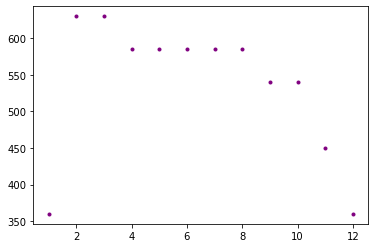

In [99]:
#每月銷售量
one = df["month"].value_counts()
plt.scatter(x = df["month"].unique() , y=one , marker = "." , c = "purple")

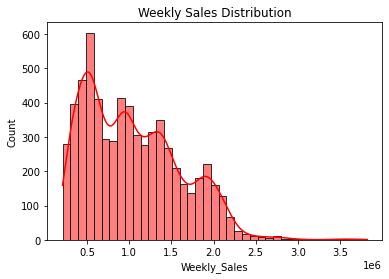

In [100]:
sns.histplot(df['Weekly_Sales'], kde=True , color = "red")
plt.title('Weekly Sales Distribution')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = "Weekly_Sales")
Y = df["Weekly_Sales"]

In [102]:
#分割資料集
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , random_state=2 , test_size = 0.2)

In [103]:
#正歸化數據
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [104]:
!pip install catboost

In [105]:
from catboost import CatBoostRegressor

In [106]:
#設置參數
params = {'random_strength': 1 , 'n_estimators': 100,'max_depth': 7 , 'loss_function':'RMSE' , 'learning_rate' : 0.1 ,  'colsample_bylevel': 0.8,
         'bootstrap_type': 'MVS', 'bagging_temperature': 1.0}

In [107]:
#訓練模型
model1 = CatBoostRegressor(**params)
X = X.select_dtypes(include = ['float64' , 'int64'])
model1.fit(X , Y)

0:	learn: 535685.5955847	total: 2.08ms	remaining: 206ms
1:	learn: 515013.0458057	total: 4.31ms	remaining: 211ms
2:	learn: 495607.2881135	total: 6.84ms	remaining: 221ms
3:	learn: 476039.2023009	total: 9.25ms	remaining: 222ms
4:	learn: 456112.8062116	total: 11.6ms	remaining: 220ms
5:	learn: 445239.6356855	total: 13.7ms	remaining: 215ms
6:	learn: 432390.3999362	total: 16.2ms	remaining: 216ms
7:	learn: 419476.6812535	total: 18.1ms	remaining: 209ms
8:	learn: 404002.2607145	total: 20.4ms	remaining: 206ms
9:	learn: 393112.2978857	total: 22.4ms	remaining: 202ms
10:	learn: 383003.4099590	total: 24.8ms	remaining: 200ms
11:	learn: 372235.2573175	total: 26.8ms	remaining: 197ms
12:	learn: 363561.5521178	total: 29ms	remaining: 194ms
13:	learn: 358363.3839748	total: 31.1ms	remaining: 191ms
14:	learn: 349688.1842527	total: 33.6ms	remaining: 190ms
15:	learn: 338669.6244143	total: 35.8ms	remaining: 188ms
16:	learn: 330657.2351312	total: 37.9ms	remaining: 185ms
17:	learn: 321421.1694775	total: 40.2ms	rem

In [108]:
model1_predict = model1.predict(X)

In [109]:
#訓練分數
model1_score = model1.score(X,Y)
model1_score

0.9436563550164426

In [110]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("MSE: ", mean_squared_error(Y, model1_predict))
print("MAE: ", mean_absolute_error(Y, model1_predict))
print("R2: ", r2_score(Y, model1_predict))
print("RMSE: ", mean_squared_error(Y, model1_predict, squared=False))

MSE:  17943207753.441357
MAE:  91235.42353297365
R2:  0.9436563550164426
RMSE:  133952.25923231515


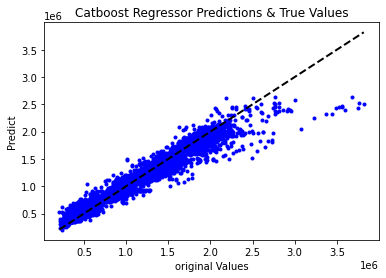

In [111]:
#將結果畫成圖表
plt.scatter(Y , model1_predict , marker = "." , color = "blue")
plt.plot([min(Y), max(Y)], [min(Y), max(Y)],linestyle='--', color='black', linewidth=2)
plt.xlabel("original Values")
plt.ylabel("Predict")
plt.title("Catboost Regressor Predictions & True Values")
plt.show()

In [112]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [113]:
!pip install xgboost

In [114]:
#準備第二個模型的訓練集跟測試集
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , random_state=42 , test_size = 0.2)
model2 = RandomForestRegressor(n_estimators = 300 , random_state = 42)

In [115]:
model2.fit(X_train , Y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [116]:
#每一行的特徵分數
feature_scores = pd.Series(model2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display the feature scores
feature_scores

Store           0.667110
CPI             0.161667
Unemployment    0.101746
month           0.030326
Temperature     0.018789
Fuel_Price      0.014905
Holiday_Flag    0.004674
year            0.000783
weekday         0.000000
dtype: float64

In [117]:
#訓練跟印出結果
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

# 輸出訓練集和測試集上的R²（決定係數）
train_score = r2_score(Y_train, y_pred_train)
test_score = r2_score(Y_test, y_pred_test)

print(f"Training R²: {train_score}")
print(f"Test R²: {test_score}")

# 如果需要，可以計算其他指標，比如均方誤差（MSE）
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training R²: 0.9922861202342411
Test R²: 0.9409822893505512
Training MSE: 2449289652.0465345
Test MSE: 19012824879.952847


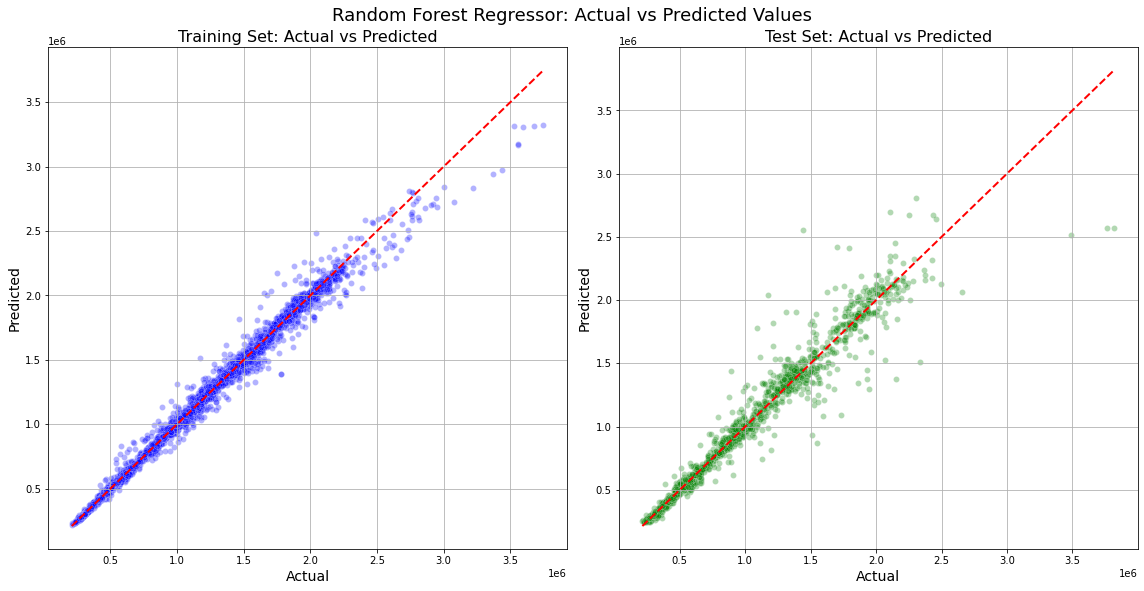

In [118]:
plt.figure(figsize=(16, 8))

# 訓練集圖形
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_pred_train, alpha=0.3, color='blue', edgecolors='w', linewidth=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Training Set: Actual vs Predicted', fontsize=16)
plt.grid(True)

# 測試集圖形
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_test, alpha=0.3, color='green', edgecolors='w', linewidth=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Test Set: Actual vs Predicted', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.suptitle('Random Forest Regressor: Actual vs Predicted Values', fontsize=18, y=1.02)
plt.show()